In [8]:
import librosa
import os
import numpy as np

def load_audio_file(file_path):
    """
    This function loads an audio file and returns a 1-D numpy array of audio samples
    :param file_path: str, path to the audio file
    :return: np.ndarray, 1-D numpy array of audio samples
    """
    input_length = 16000
    data = librosa.core.load(file_path)[0]  #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

def preprocess_audio_file(audio):
    """
    This function preprocesses the audio file and returns a normalized version of the audio.
    :param audio: np.ndarray, 1-D numpy array of audio samples
    :return: np.ndarray, normalized audio data
    """
    # Normalize the audio signal (this can be any suitable normalization)
    audio = librosa.util.normalize(audio)
    return audio
def extract_features(audio):
    """
    This function extracts MFCC features from the audio data.
    :param audio: np.ndarray, normalized audio data
    :return: np.ndarray, 2-D array of MFCC features
    """
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
    return mfccs

import librosa

def augment_audio(audio, sr, n_steps, speed_change_factor):
    """
    This function applies audio data augmentation techniques: pitch shifting and speed change.
    :param audio: np.ndarray, 1-D numpy array of audio samples
    :param sr: int, sample rate
    :param n_steps: int, how much to pitch shift (negative to decrease pitch, positive to increase pitch)
    :param speed_change_factor: float, how much to change speed (less than 1 to slow down, more than 1 to speed up)
    :return: np.ndarray, 1-D numpy array of augmented audio samples
    """
    # Pitch shifting
    augmented_audio = librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps, bins_per_octave=24)

    # Change speed
    augmented_audio = librosa.effects.time_stretch(y=augmented_audio, rate = speed_change_factor)

     # Fix length
    augmented_audio = librosa.util.fix_length(data=augmented_audio, size=len(audio))
    return augmented_audio



In [9]:
import random

def process_audio_files(directory):
    """
    This function loads, preprocesses, and extracts features from all audio files in a given directory.
    It creates three different versions of augmented audio for each original audio clip with random augmentation parameters.
    :param directory: str, path to the directory containing audio files
    :return: list of np.ndarray, list of 2-D MFCC feature arrays for each audio file
    """
    # Initialize empty list to store feature arrays
    features = []
    labels = []

    # Iterate over each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            # Load audio file
            audio = load_audio_file(os.path.join(directory, filename))
            
            # Preprocess audio
            preprocessed_audio = preprocess_audio_file(audio)
            
            # Append the features and the labels for the original audio clip
            mfccs = extract_features(preprocessed_audio)
            features.append(mfccs)
            labels.append(os.path.splitext(filename)[0])
            
            # Augment audio three times with random augmentation parameters and append the features and labels for each augmented version
            for i in range(3):
                n_steps = random.randint(-10, 10)  # Random pitch shift between -10 and 10 semitones
                speed_change_factor = random.uniform(0.8, 1.2)  # Random speed change factor between 0.8 and 1.2
                augmented_audio = augment_audio(preprocessed_audio, sr=16000, n_steps=n_steps, speed_change_factor=speed_change_factor)
                augmented_mfccs = extract_features(augmented_audio)
                features.append(augmented_mfccs)
                labels.append(os.path.splitext(filename)[0])

    return features, labels



# Call the function with the path to your dataset directory
features, labels = process_audio_files(r"C:\Users\786me\Desktop\Kashmiri Translation\downloads\WAV")



In [10]:
import matplotlib.pyplot as plt

def plot_audio(audio, title="Audio Waveform"):
    """
    This function plots the audio waveform.
    :param audio: np.ndarray, 1-D numpy array of audio samples
    :param title: str, title of the plot
    """
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.title(title)
    plt.ylabel("Amplitude")
    plt.xlabel("Sample")
    plt.show()

def plot_mfcc(mfccs, title="MFCC Features"):
    """
    This function plots the MFCC features.
    :param mfccs: np.ndarray, 2-D array of MFCC features
    :param title: str, title of the plot
    """
    plt.figure(figsize=(10, 4))
    plt.imshow(mfccs, aspect='auto', origin='lower', cmap='viridis')
    plt.title(title)
    plt.ylabel("MFCC Coefficients")
    plt.xlabel("Frame")
    plt.colorbar(format="%+2.0f dB")
    plt.show()


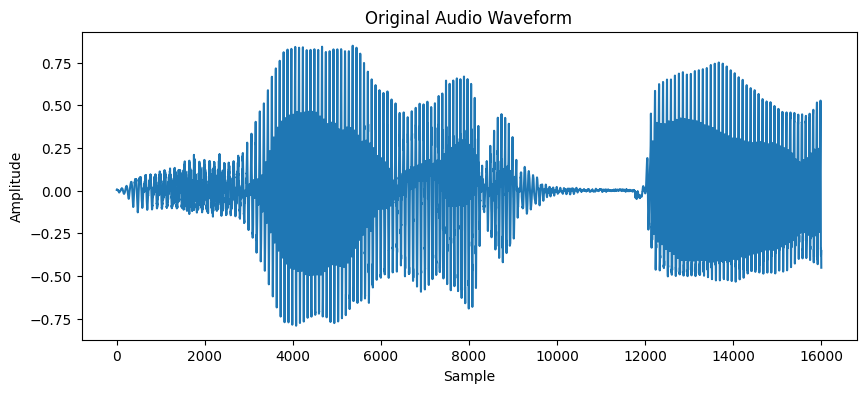

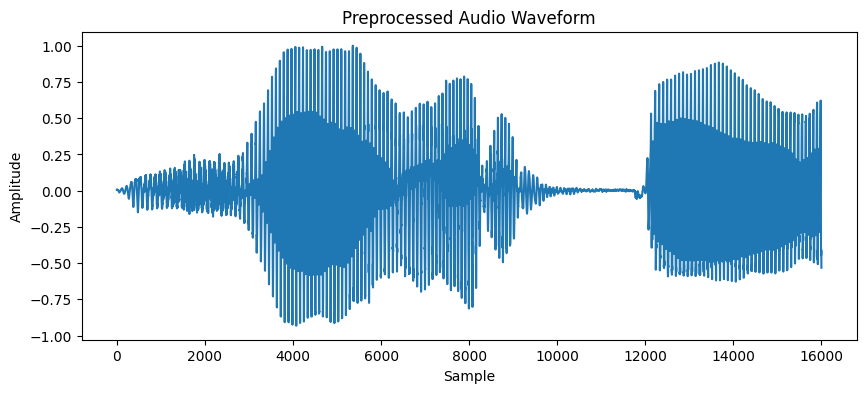

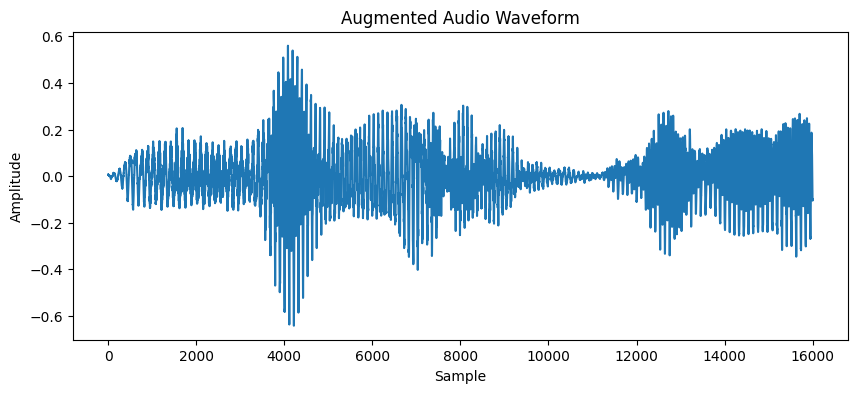

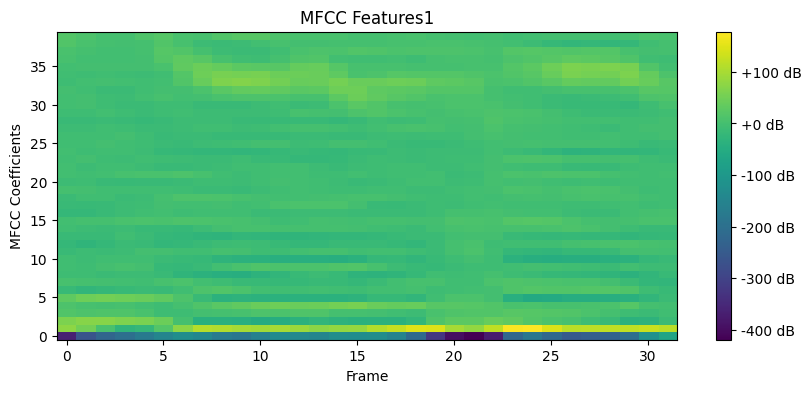

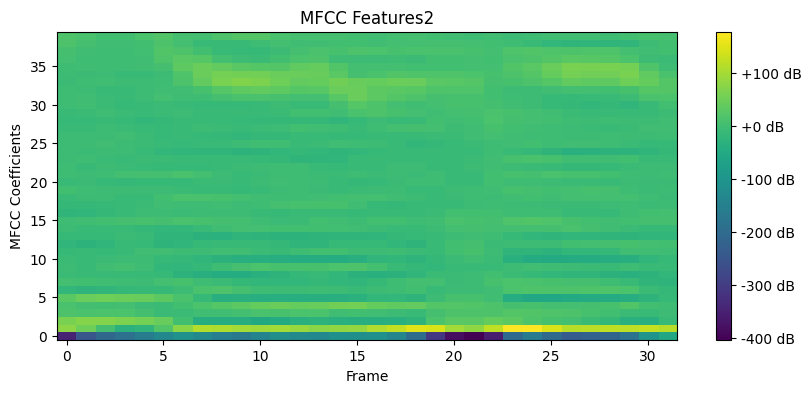

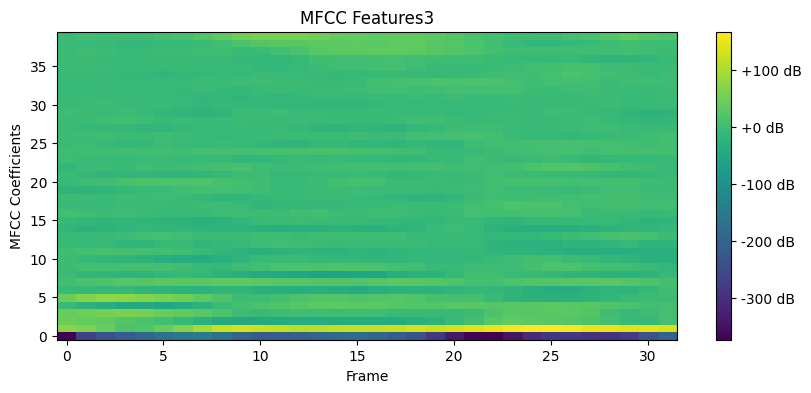

In [11]:
#Visualising
# Load, preprocess and extract features from an example audio file
audio_path = r"C:\Users\786me\Desktop\Kashmiri Translation\downloads\zῑhir_pə̄ṭʰ.mp3"
audio = load_audio_file(audio_path)
preprocessed_audio = preprocess_audio_file(audio)

n_steps = random.randint(-10, 10)  # Random pitch shift between -10 and 10 semitones
speed_change_factor = random.uniform(0.8, 1.2)  # Random speed change factor between 0.8 and 1.2
augmented_audio=augment_audio(preprocessed_audio, sr=16000, n_steps=n_steps, speed_change_factor=speed_change_factor)


mfccs1 = extract_features(audio)
mfccs2 = extract_features(preprocessed_audio)
mfccs3 = extract_features(augmented_audio)

# Plot audio waveform before and after preprocessing
plot_audio(audio, title="Original Audio Waveform")
plot_audio(preprocessed_audio, title="Preprocessed Audio Waveform")
plot_audio(augmented_audio, title="Augmented Audio Waveform")

# Plot MFCC features
plot_mfcc(mfccs1, title="MFCC Features1")
plot_mfcc(mfccs2, title="MFCC Features2")
plot_mfcc(mfccs3, title="MFCC Features3")

In [12]:
for i, feature in enumerate(features):
  print(f"Feature {i} shape: {feature.shape}")


Feature 0 shape: (40, 32)
Feature 1 shape: (40, 32)
Feature 2 shape: (40, 32)
Feature 3 shape: (40, 32)
Feature 4 shape: (40, 32)
Feature 5 shape: (40, 32)
Feature 6 shape: (40, 32)
Feature 7 shape: (40, 32)
Feature 8 shape: (40, 32)
Feature 9 shape: (40, 32)
Feature 10 shape: (40, 32)
Feature 11 shape: (40, 32)
Feature 12 shape: (40, 32)
Feature 13 shape: (40, 32)
Feature 14 shape: (40, 32)
Feature 15 shape: (40, 32)
Feature 16 shape: (40, 32)
Feature 17 shape: (40, 32)
Feature 18 shape: (40, 32)
Feature 19 shape: (40, 32)
Feature 20 shape: (40, 32)
Feature 21 shape: (40, 32)
Feature 22 shape: (40, 32)
Feature 23 shape: (40, 32)
Feature 24 shape: (40, 32)
Feature 25 shape: (40, 32)
Feature 26 shape: (40, 32)
Feature 27 shape: (40, 32)
Feature 28 shape: (40, 32)
Feature 29 shape: (40, 32)
Feature 30 shape: (40, 32)
Feature 31 shape: (40, 32)
Feature 32 shape: (40, 32)
Feature 33 shape: (40, 32)
Feature 34 shape: (40, 32)
Feature 35 shape: (40, 32)
Feature 36 shape: (40, 32)
Feature 37 

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Encode the labels to integers
le = LabelEncoder()
y = le.fit_transform(labels)

# Then one hot encode
y_hot = to_categorical(y, num_classes=len(le.classes_))


# Convert the features list to a NumPy array
X = np.array(features)

In [14]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Flatten the data (SVM needs 2D data)
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
clf = SVC(gamma='auto', C=1.0, kernel='rbf', degree=3, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


ValueError: Number of classes, 4409, does not match size of target_names, 5205. Try specifying the labels parameter

In [15]:

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00    

C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use